In [29]:
# Link to Google Colab: https://colab.research.google.com/drive/1MqJglRoirtl2PgfOGsSjIveUcDnuiVxa?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_url = 'https://raw.githubusercontent.com/lnguye782/ECGR-4105-Intro-to-ML/refs/heads/main/HW3/cancer.csv'
data = pd.read_csv(file_url)

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Separate features and target variable (30 input features / 1 output target)
X = data.drop(columns=['target'])
Y = data['target']

In [ ]:
# Split the data set into Training Data (80%) and Test Data (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data between 0 and 1 to get better accuracy
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Make an instance classifier of the object LogisticRegression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Predict on the test data
Y_pred = classifier.predict(X_test)

In [ ]:
# Use confusion matrix to get accuracy of the model
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [ ]:
# Evaluate the model using model evaluation metrics: accuracy, precision, recall, and F1 score
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


Text(45.722222222222214, 0.5, 'Actual label')

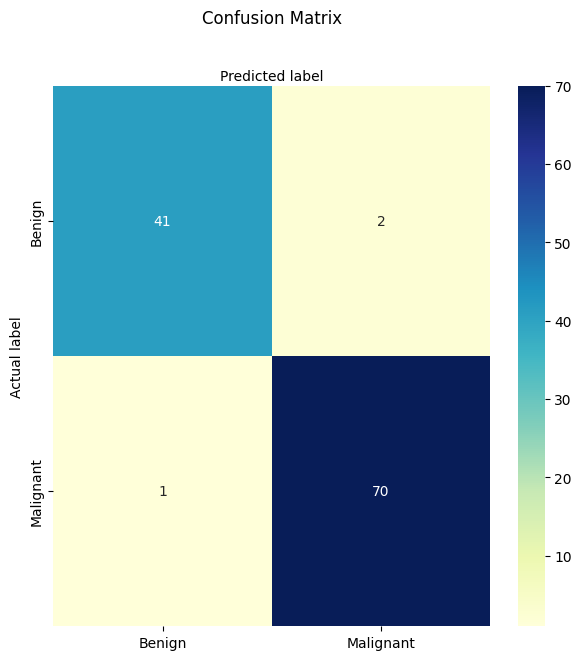

In [ ]:
# Visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn
# Plot the confusion matrix using Heatmap
import seaborn as sns

plt.figure(figsize=(6, 6))
ax = plt.subplot()

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
# Train a logistic regression model with L2 regularization
# The parameter 'C' is the inverse of regularization strength (smaller C => stronger regularization / penalty)
classifier_with_l2 = LogisticRegression(max_iter=10000, penalty='l2', C=0.01)
classifier_with_l2.fit(X_train, Y_train)

LogisticRegression(C=0.01, max_iter=10000)

In [ ]:
# New predictions on the test data with L2 regularization
Y_pred_l2 = classifier_with_l2.predict(X_test)

In [ ]:
# Use confusion matrix to get accuracy of the model with L2 regularization
conf_matrix_l2 = confusion_matrix(Y_test, Y_pred_l2)

In [ ]:
# Evaluate the model with L2 regularization using model evaluation metrics: accuracy, precision, recall, and F1 score
print("Accuracy with L2:",metrics.accuracy_score(Y_test, Y_pred_l2))
print("Precision with L2:",metrics.precision_score(Y_test, Y_pred_l2))
print("Recall with L2:",metrics.recall_score(Y_test, Y_pred_l2))
print("F1 Score with L2:",metrics.f1_score(Y_test, Y_pred_l2))

Accuracy with L2: 0.9649122807017544
Precision with L2: 0.9466666666666667
Recall with L2: 1.0
F1 Score with L2: 0.9726027397260274


Text(45.722222222222214, 0.5, 'Actual label')

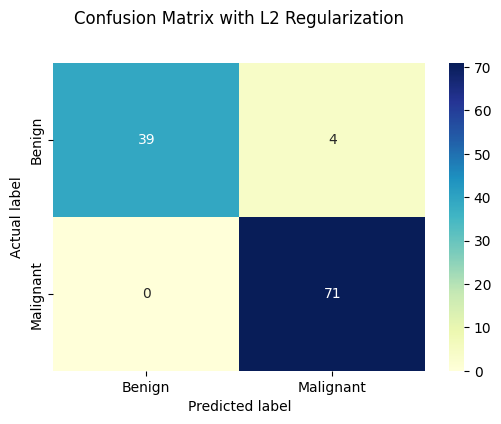

In [ ]:
# Visualize the results of the model with L2 regularization in the form of a confusion matrix using matplotlib and seaborn
# Plot the confusion matrix with L2 regularization using Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(conf_matrix_l2), annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix with L2 Regularization', y=1.1)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')